In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
#Reading the general world news headlines - Reddit Dataset

data = pd.read_csv('Combined_News_DJIA.csv')
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
#Divide the dataset into training and testing datasets 
# Training - Till 2014
# Testing - 2015-16

train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']
test.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1611,2015-01-02,1,Most cases of cancer are the result of sheer b...,Iran dismissed United States efforts to fight ...,Poll: One in 8 Germans would join anti-Muslim ...,UK royal family's Prince Andrew named in US la...,Some 40 asylum-seekers refused to leave the bu...,Pakistani boat blows self up after India navy ...,Sweden hit by third mosque arson attack in a week,940 cars set alight during French New Year,...,Ukrainian minister threatens TV channel with c...,Palestinian President Mahmoud Abbas has entere...,Israeli security center publishes names of 50 ...,The year 2014 was the deadliest year yet in Sy...,A Secret underground complex built by the Nazi...,Restrictions on Web Freedom a Major Global Iss...,Austrian journalist Erich Mchel delivered a pr...,Thousands of Ukraine nationalists march in Kiev,Chinas New Years Resolution: No More Harvestin...,Authorities Pull Plug on Russia's Last Politic...
1612,2015-01-05,0,Moscow-&gt;Beijing high speed train will reduc...,Two ancient tombs were discovered in Egypt on ...,China complains to Pyongyang after N Korean so...,Scotland Headed Towards Being Fossil Fuel-Free...,Prime Minister Shinzo Abe said Monday he will ...,Sex slave at centre of Prince Andrew scandal f...,Gay relative of Hamas founder faces deportatio...,The number of female drug addicts in Iran has ...,...,The Islamic State has approved a 2015 budget o...,"Iceland To Withdraw EU Application, Lift Capit...",Blackfield Capital Founder Goes Missing: The v...,Rocket stage crashes back to Earth in rural Ch...,2 Dead as Aircraft Bombs Greek Tanker in Libya...,Belgian murderer Frank Van Den Bleeken to die ...,Czech President criticizes Ukrainian PM; says ...,3 Vietnamese jets join search for 16 missing F...,France seeks end to Russia sanctions over Ukraine,China scraps rare earths caps
1613,2015-01-06,0,US oil falls below $50 a barrel,"Toyota gives away 5,680 fuel cell patents to b...",Young Indian couple who had been granted polic...,A senior figure in Islamic States self-declare...,Fukushima rice passes radiation tests for 1st ...,Nearly all Spanish parties guilty of financial...,King Abdullah to abdicate Saudi Throne,Taliban Commander Caught Networking On LinkedIn,...,Thousands of Indians have fled from their home...,Turkey sacks judges who oversaw Erdogan corrup...,SpaceX Falcon 9 launch and recovery has been a...,CNN: Americans charged in botched Gambia coup,Islamic State 'Police' Official Beheaded.,Libya bans Palestinians from country to preven...,A judicial inquiry was opened in France on Mon...,Video has captured the moment a cameraman was ...,Syria has complained to the United Nations tha...,"Tests over, India set to make the iris of bigg..."
1614,2015-01-07,1,'Shots fired' at French magazine HQ,90% of Bibi Netanyahus Campaign Funds From U.S.,ISIS behead street magician for entertaining c...,Denmark sets new world record in renewable ene...,"ISIS Closes Schools In Syria, Leaving 670000 C...",The European Union wants Turkey to explain how...,10 people have died in a shooting at the headq...,Most Earth-like planet ever discovered could b...,...,Discovery of witnesss mutilated body feeds cla...,Radical Islam a growing threat to sub-Saharan ...,Tony Blair may 'face war crime charges' over I...,Benjamin Netanyahu says settlements unlikely t...,Tasmania moves to allow corporations to sue pr...,Indonesia search chief: Tail section of AirAsi...,"North Korean Defector: ""Bureau 121"" Hackers lo...",Female suicide bomber attacks police station i...,IS to turn Syria schools into religious indoct...,Ebola vaccine trials in Halifax so far a success
1615,2015-01-08,1,New Charlie Hebdo issue to come out next week:...,"Ahmed Merabet, Cop Killed In Paris Attacks, Wa...",Youngest Suspect in Charlie Hebdo Attack Turns...,"Grenades thrown at a mosque in Le Mans, west o...",Danish newspaper to print Charlie Hebdo cartoo...,M

In [15]:
example = train.iloc[3,10]
example2 = example.lower()

In [16]:
example3 = CountVectorizer().build_tokenizer()(example2)
print(example3)

['the', 'commander', 'of', 'navy', 'air', 'reconnaissance', 'squadron', 'that', 'provides', 'the', 'president', 'and', 'the', 'defense', 'secretary', 'the', 'airborne', 'ability', 'to', 'command', 'the', 'nation', 'nuclear', 'weapons', 'has', 'been', 'relieved', 'of', 'duty']


In [37]:
pd.DataFrame([[x,example3.count(x)] for x in set(example3)], columns = ['Word', 'Count'])

NameError: name 'example3' is not defined

In [8]:
#Get the headlines

trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))
    
trainheadlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [9]:
# Tokenizing

basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)
print(basictrain.shape)

(1611, 31675)


In [10]:
#Training a classifier - here Logistic

basicmodel = LogisticRegression(penalty = 'l1',C=0.2)
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [121]:
from sklearn.naive_bayes import BernoulliNB
basicmodel = BernoulliNB()
temp = train["Label"]
# print(temp)
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [11]:
from sklearn.tree import DecisionTreeClassifier
basicmodel = DecisionTreeClassifier()
basicmodel = basicmodel.fit(basictrain,train["Label"])

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
basicmodel = GradientBoostingClassifier()
basicmodel = basicmodel.fit(basictrain,train["Label"])

In [23]:
from sklearn.ensemble import RandomForestClassifier
basicmodel = RandomForestClassifier()
basicmodel = basicmodel.fit(basictrain,train["Label"])

In [84]:
from sklearn.svm import LinearSVC
basicmodel = LinearSVC(fit_intercept='False')
basicmodel = basicmodel.fit(basictrain,train["Label"])

In [11]:
djia = pd.read_csv('DJIA_table.csv')
djia_test = djia[djia['Date'] > '2014-12-31']
djia_train = djia[djia['Date'] < '2015-01-01' ]
djia_train.head()

,Date,Open,High,Low,Close,Volume,Adj Close
378,2014-12-31,17987.660156,18043.220703,17820.880859,17823.070312,82840000,17823.070312
379,2014-12-30,18035.019531,18035.019531,17959.699219,17983.070312,47490000,17983.070312
380,2014-12-29,18046.580078,18073.039062,18021.570312,18038.230469,53870000,18038.230469
381,2014-12-26,18038.300781,18103.449219,18038.300781,18053.710938,52570000,18053.710938
382,2014-12-24,18035.730469,18086.240234,18027.779297,18030.210938,42870000,18030.210938


In [40]:
basicmodel = LinearRegression()
basicmodel = basicmodel.fit(basictrain, djia_train["Close"])

In [12]:
# Getting the test headlines 
# Predicting the direction of DJIA index

testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
predictions = basicmodel.predict(basictest)

In [13]:
print(predictions)

[0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1
 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1
 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0
 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1]


In [14]:
# Checking the accuracy

pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,82,104
1,79,113


In [37]:
x = djia_test['Date']
y = djia_test['Close']

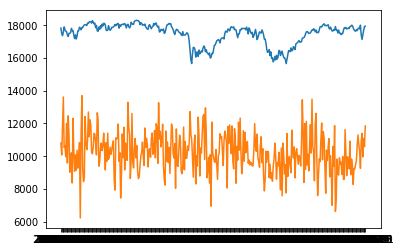

In [39]:
plt.plot(x,y)
plt.plot(x,predictions)
plt.show()